# Anomaly Detection Examples with R carData Davis dataset with Gaussian Mixture Model

井出剛著「入門 機械学習による異常検知〜Rによる実践ガイド」P90-93 の例

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

In [2]:
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/carData/Davis.csv'
df = pd.read_csv(url, index_col=0)

In [3]:
data = df[['weight','height']]

## 混合ガウス分布のパラメータ推定

インデックス12の外れ値を除くデータを用意

In [4]:
from sklearn.mixture import GaussianMixture

normal_data = data.drop(12)

### BICを基準にクラスタ数を決定

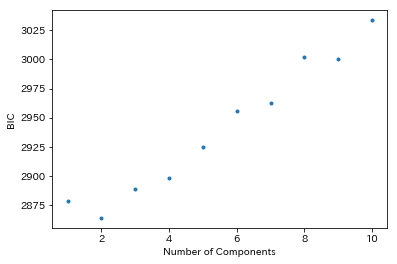

In [5]:
results = []
for i in range(1,11):
    gmm = GaussianMixture(n_components=i).fit(normal_data)
    results.append(gmm.bic(normal_data))

plt.plot(range(1,11), results, '.')
plt.xlabel('Number of Components')
plt.ylabel('BIC')
plt.show()

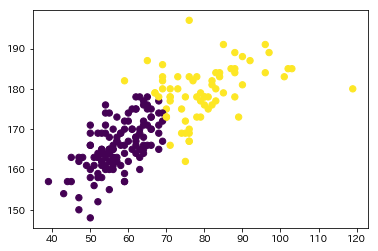

In [6]:
gmm = GaussianMixture(n_components=2).fit(normal_data)
labels = gmm.predict(normal_data)
plt.scatter(normal_data['weight'], normal_data['height'], c=labels, s=40, cmap='viridis');

In [7]:
a = -gmm.score_samples(data)

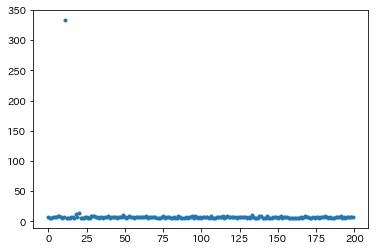

In [8]:
plt.plot(a, '.')
plt.show()